# Model test: single trigger word

## Results



TODO: Report and discuss model results

## Initialization

In [1]:
import numpy as np
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import IPython
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import util_test as utt
import dataset as ds
import util_model as um

/home/luca/anaconda3/envs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%load_ext autoreload
%autoreload 2

## Loading the dataset

In [5]:
ds_folder = "../datasets/activation/2"
ds_tra, ds_dev, ds_tes = ds.load_dataset(ds_folder)
X_train, Y_train = ds_tra
X_dev, Y_dev = ds_dev
X_test, Y_test = ds_tes

In [6]:
meta = ds.load_dataset_metadata(ds_folder)
print(meta)

{'class_dirs': ['raw-dataset/words/not-vlc', 'raw-dataset/words/vlc'], 'background_dir': 'raw-dataset/backgrounds/1', 'class_labels': ['not-vlc', 'vlc'], 'n_classes': 2, 'n_samples': 6000, 'is_neg_class': True, 'create_global_feat': False, 'n_samples_per_training_split': None, 'n_training_samples': 4200, 'n_training_files': 0}


## Training history

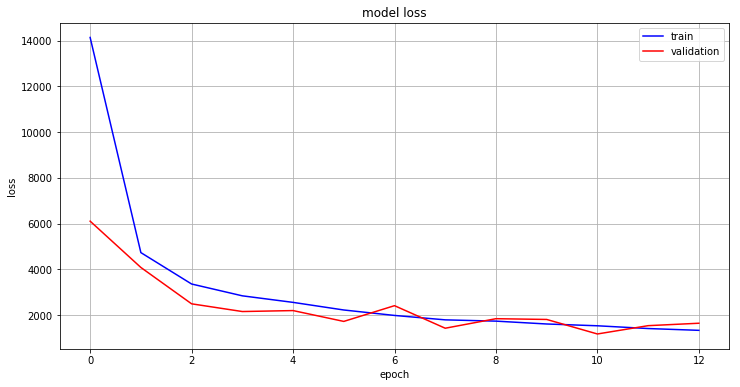

In [3]:
model_folder = '../models/model_trigger_3'
h = um.TrainingHistory(model_folder)
h.plot()

## Loading the model

In [4]:
epoch = 12
model = um.load_model(model_folder,epoch)

## Global custom metrics

In [7]:
print("Predicting on training set")
Yp_train = model.predict(X_train)
print("Predicting on dev set")
Yp_dev = model.predict(X_dev)

Predicting on training set
Predicting on dev set


In [20]:
print("Training set metrics")
mt1, mt2 = utt.compute_global_metrics_single(Y_train, Yp_train)
print(mt1)
print("\nValidation set metrics")
md1, md2 = utt.compute_global_metrics_single(Y_dev, Yp_dev)
print(md1)

Training set metrics
{'precision': 0.9279076316530555, 'recall': 0.8405612244897959, 'f1_score': 0.8820773658144827, '_tp': 3295, '_fn': 625, '_fp': 256, '_tp_delta_avg': 6.5505311077389985, '_tp_delta_std': 10.297929134602986, '_tp_peak_len_avg': 44.49984825493171}

Validation set metrics
{'precision': 0.9391304347826087, 'recall': 0.865979381443299, 'f1_score': 0.9010727056019071, '_tp': 756, '_fn': 117, '_fp': 49, '_tp_delta_avg': 6.703703703703703, '_tp_delta_std': 10.483421025701315, '_tp_peak_len_avg': 44.398148148148145}


## Plotting random samples from training set

### True positives

Sample: 2172


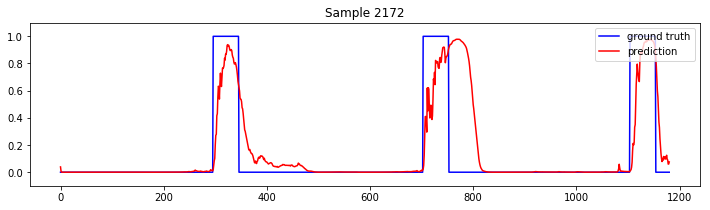

Sample: 3041


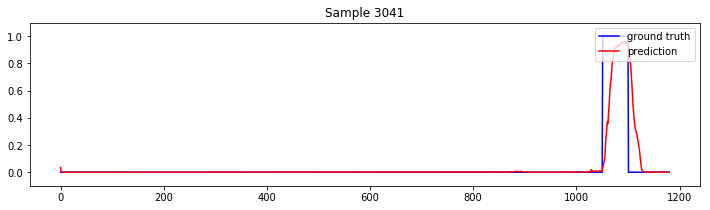

Sample: 525


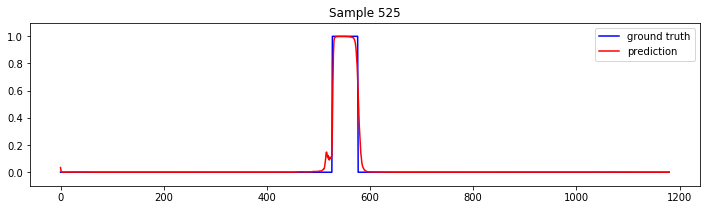

Sample: 33


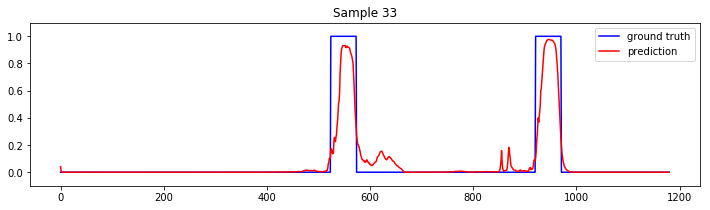

Sample: 3840


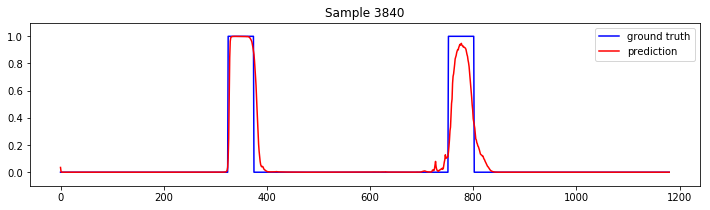

Sample: 1068


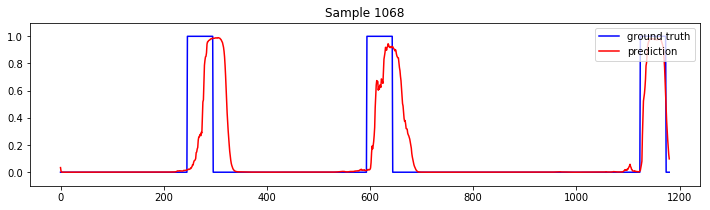

<Figure size 864x216 with 0 Axes>

In [27]:
plt.rcParams["figure.figsize"] =(12,3)
utt.evaluate_plot_single(Y_train, Yp_train, n_plot=6, ds_folder=None, delta=1800, idx_list=mt2['_tp'])

### False positives

Sample: 1777


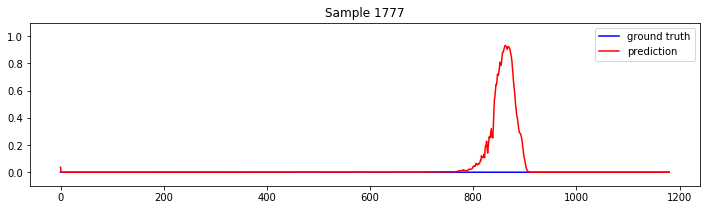

Sample: 1749


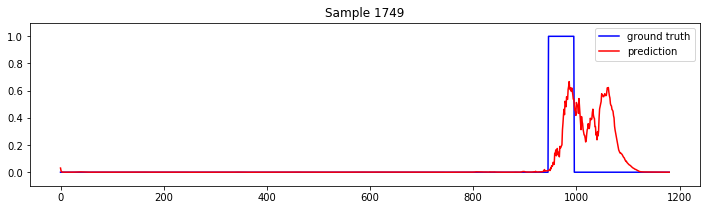

Sample: 254


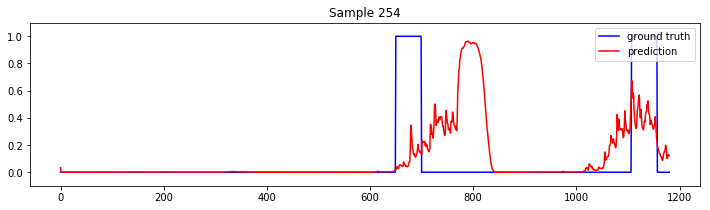

Sample: 142


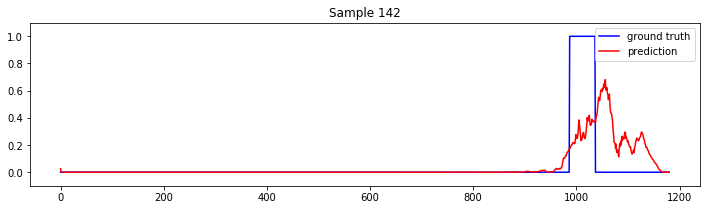

Sample: 2577


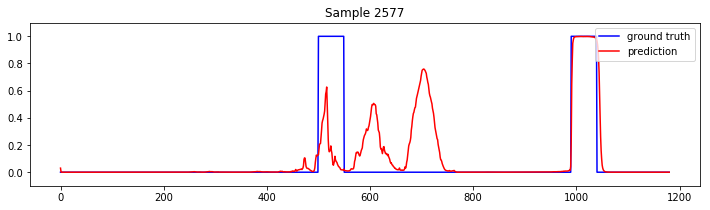

Sample: 524


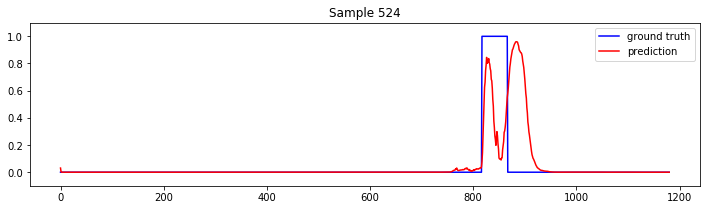

<Figure size 864x216 with 0 Axes>

In [22]:
plt.rcParams["figure.figsize"] =(12,3)
utt.evaluate_plot_single(Y_train, Yp_train, n_plot=6, ds_folder=None, delta=1800, idx_list=mt2['_fp'])

### False negatives

Sample: 3430


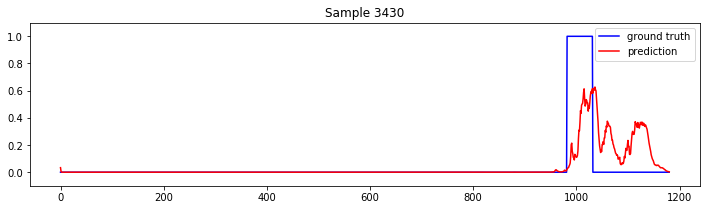

Sample: 3904


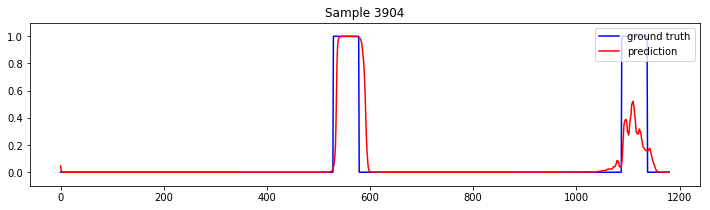

Sample: 3083


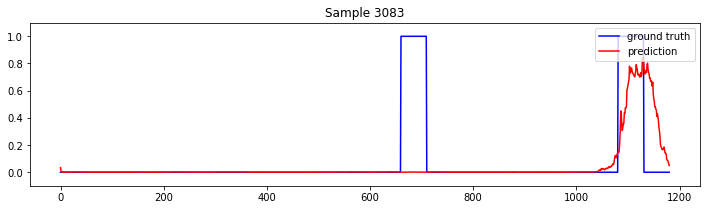

Sample: 42


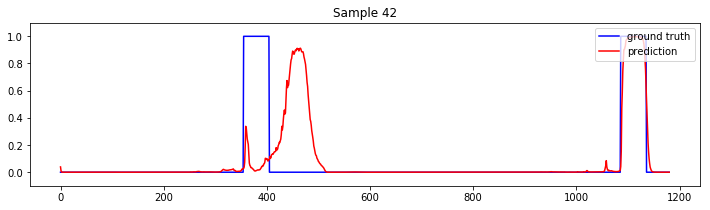

Sample: 68


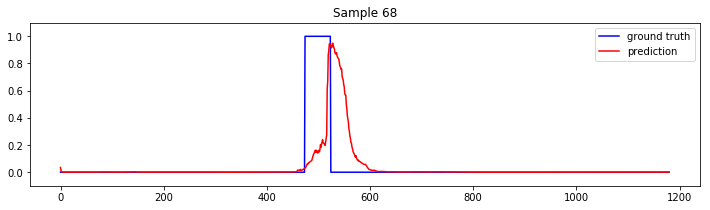

Sample: 768


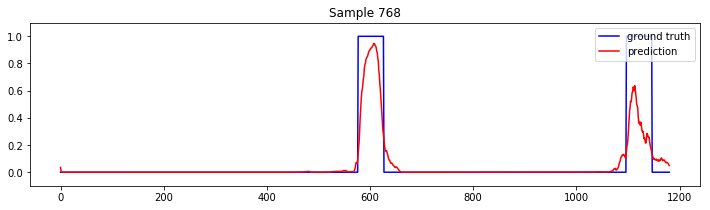

<Figure size 864x216 with 0 Axes>

In [23]:
plt.rcParams["figure.figsize"] =(12,3)
utt.evaluate_plot_single(Y_train, Yp_train, n_plot=6, ds_folder=None, delta=1800, idx_list=mt2['_fn'])

## Plotting random samples from validation set

### True positives

Sample: 14


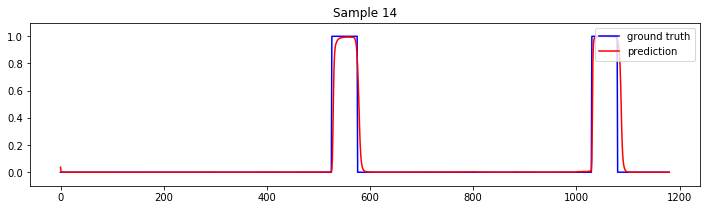

Sample: 131


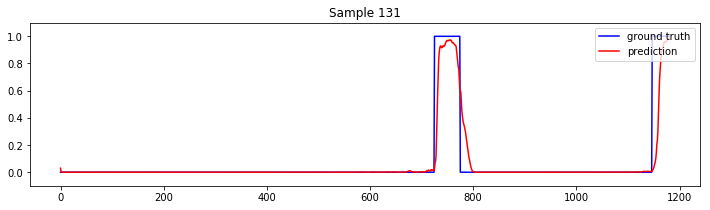

Sample: 394


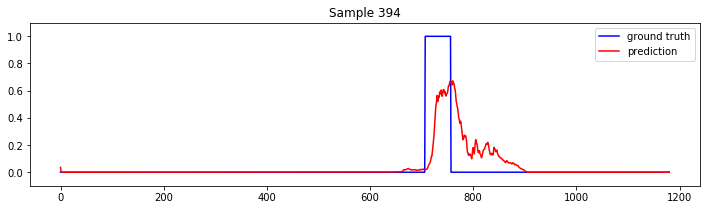

Sample: 727


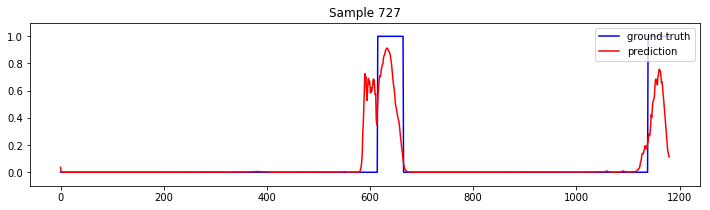

Sample: 413


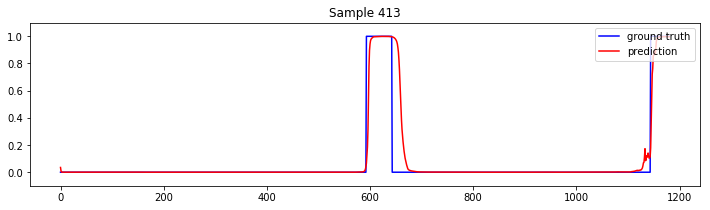

Sample: 228


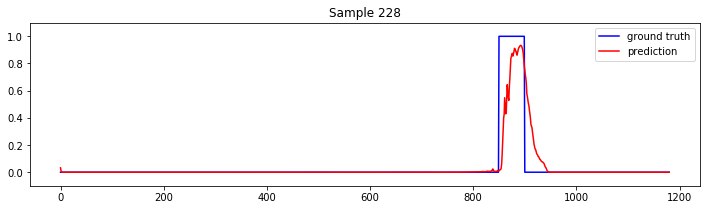

<Figure size 864x216 with 0 Axes>

In [24]:
plt.rcParams["figure.figsize"] =(12,3)
utt.evaluate_plot_single(Y_dev, Yp_dev, n_plot=6, ds_folder=None, delta=0, idx_list=md2['_tp'])

### False positives

Sample: 278


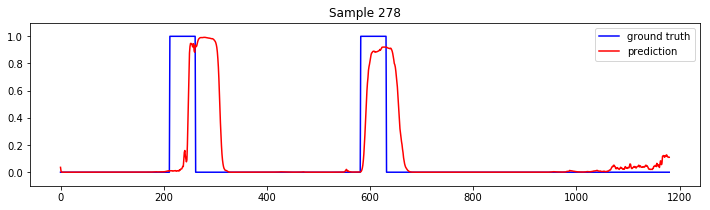

Sample: 743


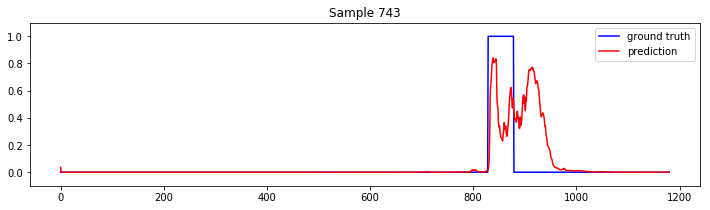

Sample: 305


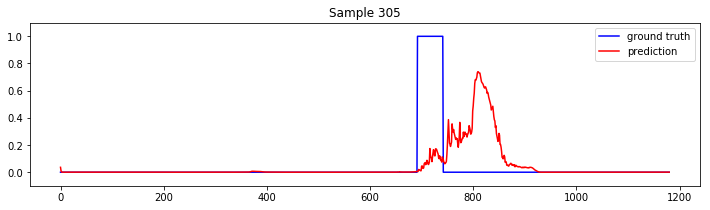

Sample: 309


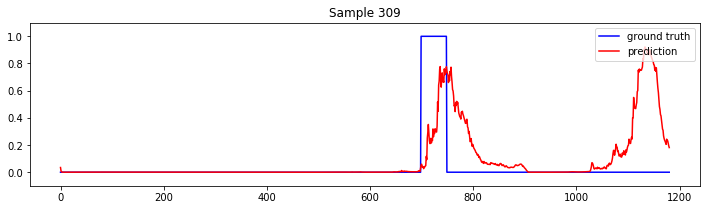

Sample: 465


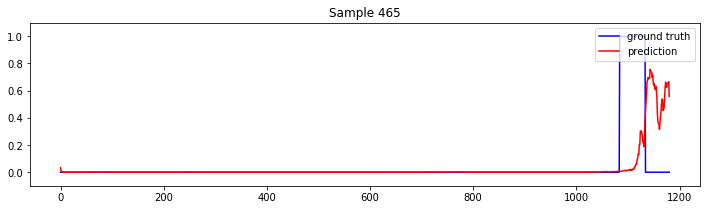

Sample: 604


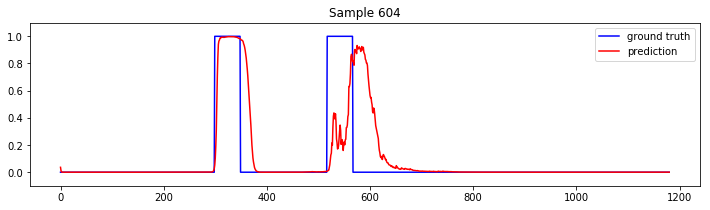

<Figure size 864x216 with 0 Axes>

In [25]:
plt.rcParams["figure.figsize"] =(12,3)
utt.evaluate_plot_single(Y_dev, Yp_dev, n_plot=6, ds_folder=None, delta=0, idx_list=md2['_fp'])

### False negatives

Sample: 8


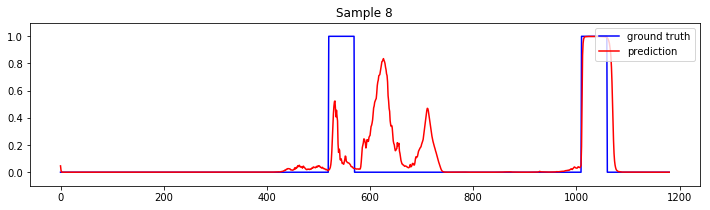

Sample: 483


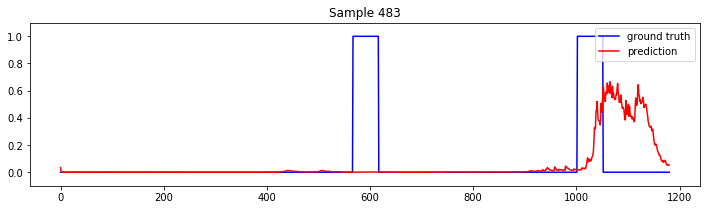

Sample: 64


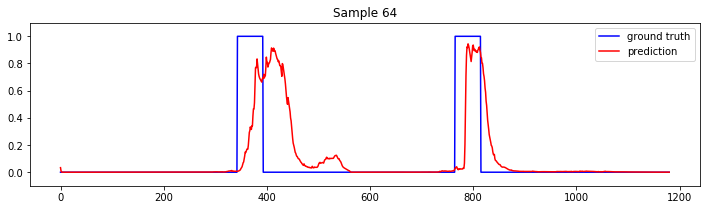

Sample: 743


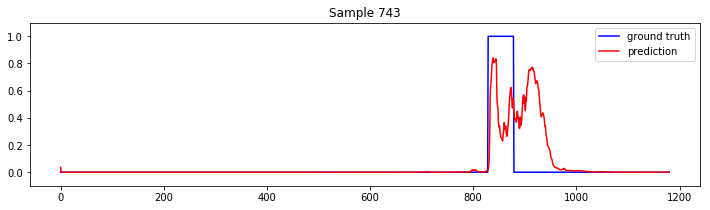

Sample: 711


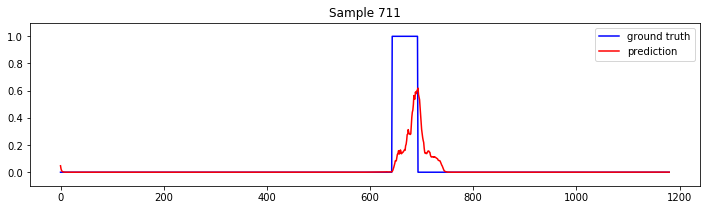

Sample: 89


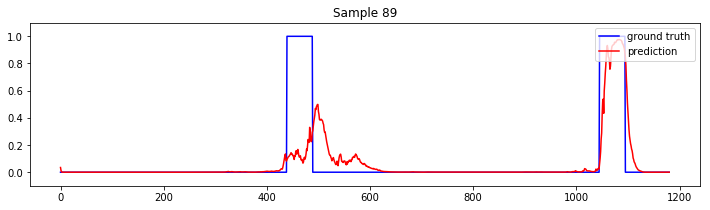

<Figure size 864x216 with 0 Axes>

In [26]:
plt.rcParams["figure.figsize"] =(12,3)
utt.evaluate_plot_single(Y_dev, Yp_dev, n_plot=6, ds_folder=None, delta=0, idx_list=md2['_fn'])

## Test for prediction with a variable number of samples

In [4]:
ep = 12
model_live = um.load_model_for_live(model_folder,ep)

In [32]:
y = model_live.predict(X_dev[:1,:19], batch_size=1)
print(y.shape)
print(X_dev[:1,:19].shape, X_dev.dtype)

(1, 19, 1)
(1, 19, 129) float32


In [33]:
Yp_dev_live = model_live.predict(X_dev, batch_size=1)

In [34]:
print("\nValidation set metrics")
m, _ = utt.compute_global_metrics_single(Y_dev, Yp_dev_live)
print(m)


Validation set metrics
{'precision': 0.8839390386869871, 'recall': 0.86368843069874, 'f1_score': 0.8736964078794901, '_tp': 754, '_fn': 119, '_fp': 99, '_tp_delta_avg': 6.639257294429708, '_tp_delta_std': 10.39498450781779, '_tp_peak_len_avg': 44.40185676392573}


Predict on file
(1, 26656, 129)
# peaks 15
Peaks:
(1430, 1462)
(6028, 6051)
(7045, 7066)
(7112, 7149)
(8979, 9079)
(10766, 10793)
(12025, 12043)
(13164, 13206)
(14136, 14205)
(16545, 16583)
(17535, 17601)
(18494, 18557)
(20840, 20886)
(23082, 23103)
(25383, 25413)


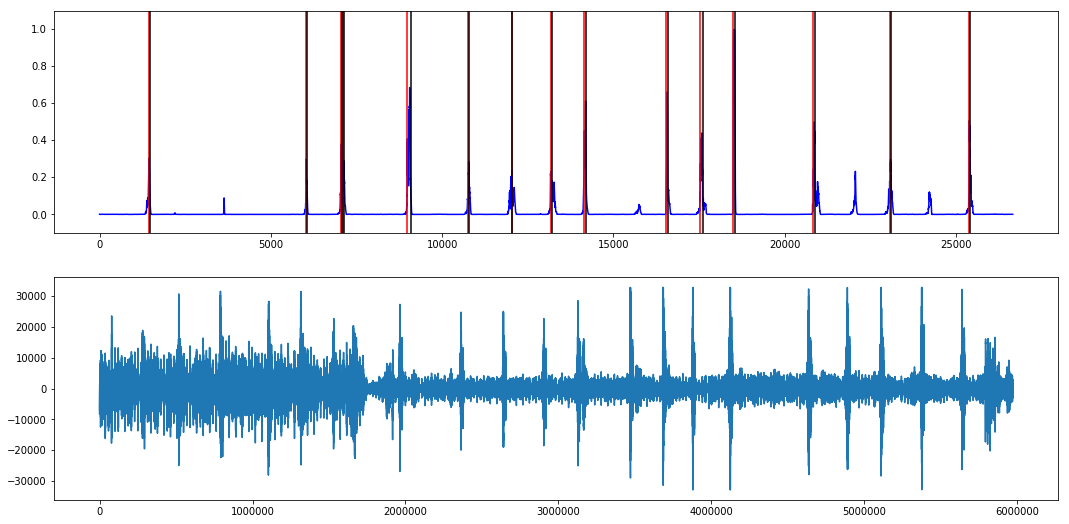

(array([[[0.00079912],
         [0.00100669],
         [0.00108543],
         ...,
         [0.00067128],
         [0.00067864],
         [0.00067177]]], dtype=float32),
 [(1430, 1462),
  (6028, 6051),
  (7045, 7066),
  (7112, 7149),
  (8979, 9079),
  (10766, 10793),
  (12025, 12043),
  (13164, 13206),
  (14136, 14205),
  (16545, 16583),
  (17535, 17601),
  (18494, 18557),
  (20840, 20886),
  (23082, 23103),
  (25383, 25413)])

In [11]:
print("Predict on file")
plt.rcParams["figure.figsize"] =(18,9)
utt.predict_audio_clip_single(model_live,"../output_3.wav",confidence_thres=0.15)